<a href="https://colab.research.google.com/github/Meemansha-spec/meem.github.io/blob/master/ML_PROJECT_CRIME_RATE_IN_CHICAGO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Predicting crime rates in Chicago using `FACEBOOK PROPHET` which us used for time series analysis**

## Import the data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet


In [3]:
chicago_df_1 = pd.read_csv('/content/drive/MyDrive/Chicago_Crimes_2001_to_2004.csv',error_bad_lines=False)
chicago_df_2 = pd.read_csv('/content/drive/MyDrive/Chicago_Crimes_2005_to_2007.csv',error_bad_lines=False)
chicago_df_3 = pd.read_csv('/content/drive/MyDrive/Chicago_Crimes_2008_to_2011.csv',error_bad_lines=False)
chicago_df_4 = pd.read_csv('/content/drive/MyDrive/Chicago_Crimes_2012_to_2017.csv',error_bad_lines=False)


b'Skipping line 1513591: expected 23 fields, saw 24\n'
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (17,20) have mixed types.Specify dtype option on import or set low_memory=False.

b'Skipping line 533719: expected 23 fields, saw 24\n'
b'Skipping line 1149094: expected 23 fields, saw 41\n'


## Concatenate the data

In [5]:
Chicago_df = pd.concat([chicago_df_1,chicago_df_2,chicago_df_3,chicago_df_4])

In [6]:
Chicago_df.shape

(7941282, 23)

In [7]:
Chicago_df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,879,4786321,HM399414,01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,424,4.0,7.0,46.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,2544,4676906,HM278933,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,935,9.0,11.0,61.0,26,1173974.0,1.87676e+06,2003.0,04/15/2016 08:55:02 AM,41.8172,-87.637328,"(41.817229156, -87.637328162)"
2,2919,4789749,HM402220,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False,1413,14.0,35.0,22.0,20,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
3,2927,4789765,HM402058,12/30/2004 08:00:00 PM,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False,2521,25.0,31.0,20.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,3302,4677901,HM275615,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False,2233,22.0,34.0,49.0,06,1174948.0,1.83105e+06,2003.0,04/15/2016 08:55:02 AM,41.6918,-87.635116,"(41.691784636, -87.635115968)"


In [8]:
## Check missing data
Chicago_df.isna().sum()

Unnamed: 0                   0
ID                           0
Case Number                  7
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      1990
Arrest                       0
Domestic                     0
Beat                         0
District                    91
Ward                    700224
Community Area          702091
FBI Code                     0
X Coordinate            105573
Y Coordinate            105573
Year                         0
Updated On                   0
Latitude                105573
Longitude               105574
Location                105574
dtype: int64

### plot the missing data

In [1]:
#plt.figure(figsize = (10,10))
#sns.heatmap(Chicago_df.isnull(),cbar =  False , cmap = 'YlGnBu')

In [41]:
Chicago_df.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [9]:
## select only necessary data
Chicago_df = pd.DataFrame(Chicago_df[['Date', 'Block','Primary Type', 'Description', 'Arrest','Domestic','Location Description']])

In [10]:
Chicago_df.head()

,Date,Block,Primary Type,Description,Arrest,Domestic,Location Description
0,01/01/2004 12:01:00 AM,082XX S COLES AVE,THEFT,FINANCIAL ID THEFT: OVER $300,False,False,RESIDENCE
1,03/01/2003 12:00:00 AM,004XX W 42ND PL,OTHER OFFENSE,HARASSMENT BY TELEPHONE,False,True,RESIDENCE
2,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,False,False,RESIDENCE
3,12/30/2004 08:00:00 PM,045XX W MONTANA ST,THEFT,FINANCIAL ID THEFT: OVER $300,False,False,OTHER
4,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,THEFT,FINANCIAL ID THEFT:$300 &UNDER,False,False,RESIDENCE


## Set the Date column

In [11]:
Chicago_df.Date = pd.to_datetime(Chicago_df.Date , format = '%m/%d/%Y %I:%M:%S %p')

In [12]:
Chicago_df.head()

,Date,Block,Primary Type,Description,Arrest,Domestic,Location Description
0,2004-01-01 00:01:00,082XX S COLES AVE,THEFT,FINANCIAL ID THEFT: OVER $300,False,False,RESIDENCE
1,2003-03-01 00:00:00,004XX W 42ND PL,OTHER OFFENSE,HARASSMENT BY TELEPHONE,False,True,RESIDENCE
2,2004-06-20 11:00:00,025XX N KIMBALL AVE,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,False,False,RESIDENCE
3,2004-12-30 20:00:00,045XX W MONTANA ST,THEFT,FINANCIAL ID THEFT: OVER $300,False,False,OTHER
4,2003-05-01 01:00:00,111XX S NORMAL AVE,THEFT,FINANCIAL ID THEFT:$300 &UNDER,False,False,RESIDENCE


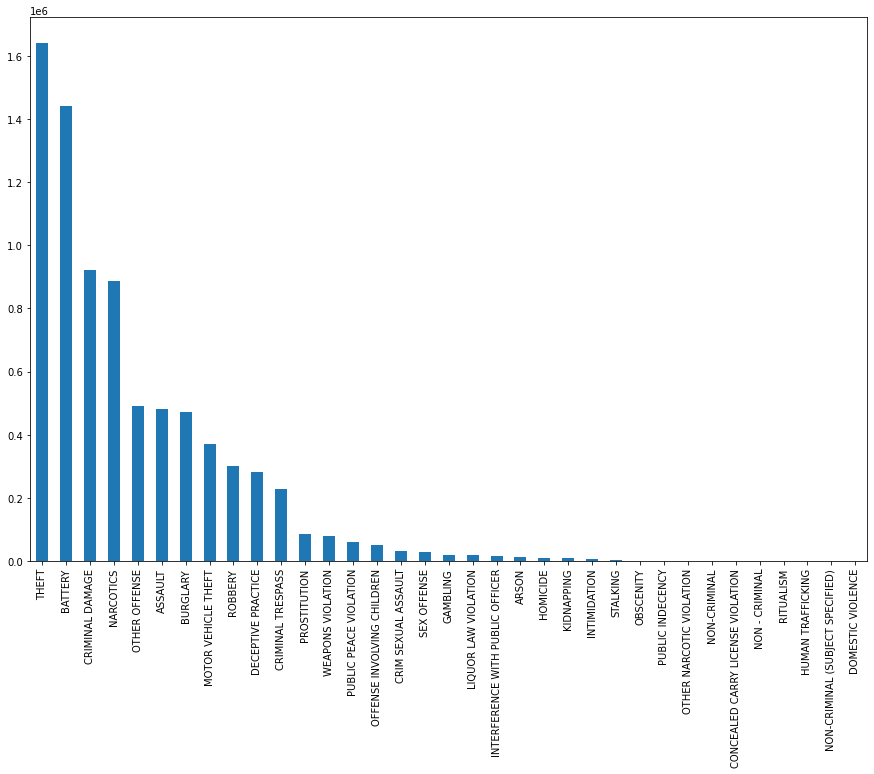

In [13]:
plt.figure(figsize= (15,10))
Chicago_df['Primary Type'].value_counts().plot(kind = 'bar')

In [14]:
crime_rate = Chicago_df['Primary Type'].value_counts().index

In [15]:
Chicago_df['Primary Type'].value_counts()

THEFT                                1640506
BATTERY                              1442716
CRIMINAL DAMAGE                       923000
NARCOTICS                             885431
OTHER OFFENSE                         491922
ASSAULT                               481661
BURGLARY                              470958
MOTOR VEHICLE THEFT                   370548
ROBBERY                               300453
DECEPTIVE PRACTICE                    280931
CRIMINAL TRESPASS                     229366
PROSTITUTION                           86401
WEAPONS VIOLATION                      77429
PUBLIC PEACE VIOLATION                 58548
OFFENSE INVOLVING CHILDREN             51441
CRIM SEXUAL ASSAULT                    29868
SEX OFFENSE                            28707
GAMBLING                               18806
LIQUOR LAW VIOLATION                   17513
INTERFERENCE WITH PUBLIC OFFICER       15710
ARSON                                  13097
HOMICIDE                                9051
KIDNAPPING

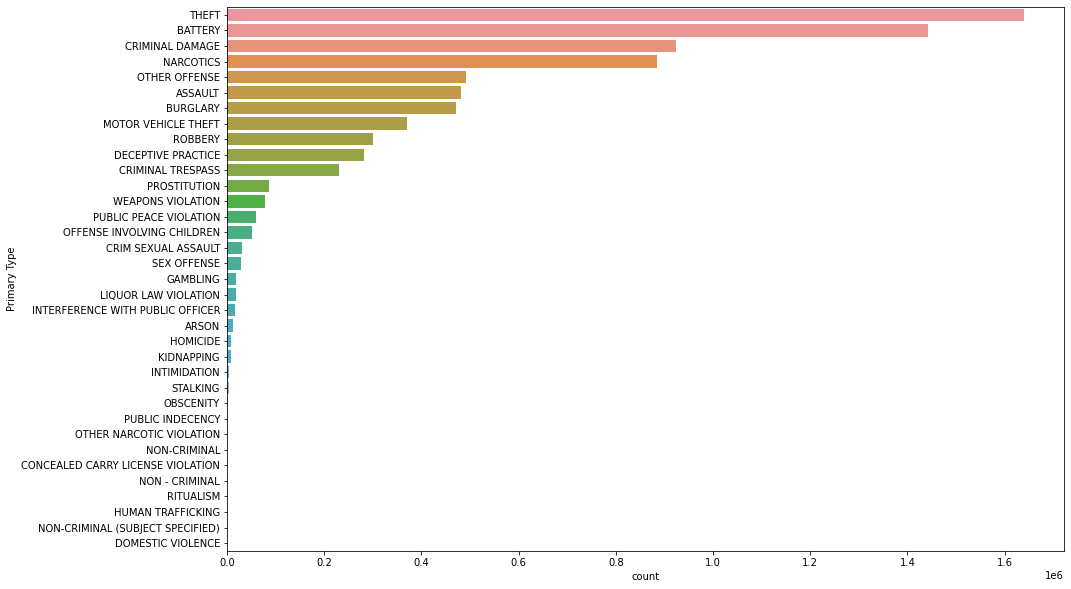

In [16]:
plt.figure(figsize= (15,10))
sns.countplot(y = 'Primary Type' , data = Chicago_df,order = crime_rate)

In [24]:
Chicago_df.dtypes

Date            datetime64[ns]
Block                   object
Primary Type            object
Description             object
Arrest                    bool
Domestic                  bool
dtype: object

In [20]:
crime_place = Chicago_df['Location Description'].value_counts().iloc[:15].index

In [22]:
Chicago_df['Location Description'].value_counts()

STREET                 2101842
RESIDENCE              1341749
SIDEWALK                815595
APARTMENT               812512
OTHER                   294286
                        ...   
POOLROOM                     1
TRUCKING TERMINAL            1
LAGOON                       1
GOVERNMENT BUILDING          1
LIVERY AUTO                  1
Name: Location Description, Length: 172, dtype: int64

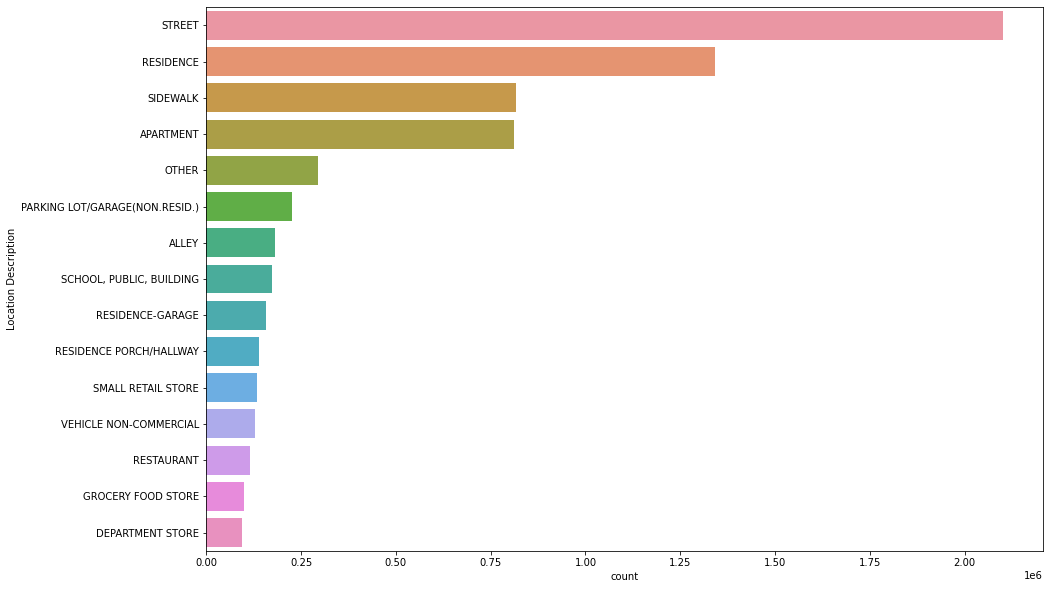

In [21]:
plt.figure(figsize= (15,10))
sns.countplot(y='Location Description',data = Chicago_df,order = crime_place)

In [29]:
Chicago_df.index = pd.DatetimeIndex(Chicago_df.Date)

In [31]:
Chicago_df.resample('Y').size()

Date
2001-12-31    568518
2002-12-31    490879
2003-12-31    475913
2004-12-31    388205
2005-12-31    455811
2006-12-31    794684
2007-12-31    621848
2008-12-31    852053
2009-12-31    783900
2010-12-31    700691
2011-12-31    352066
2012-12-31    335670
2013-12-31    306703
2014-12-31    274527
2015-12-31    262995
2016-12-31    265462
2017-12-31     11357
Freq: A-DEC, dtype: int64

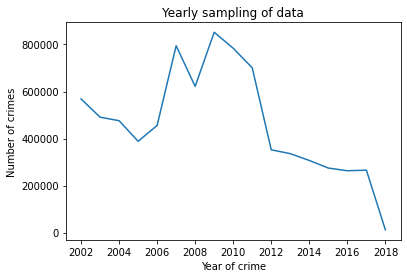

In [36]:
plt.plot(Chicago_df.resample('Y').size());
plt.title('Yearly sampling of data');
plt.xlabel('Year of crime');
plt.ylabel('Number of crimes');

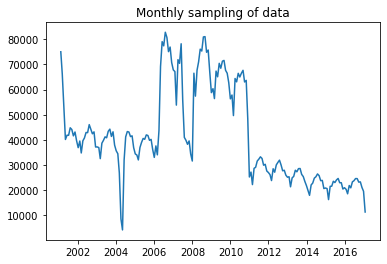

In [38]:
plt.plot(Chicago_df.resample('M').size());
plt.title('Monthly sampling of data');

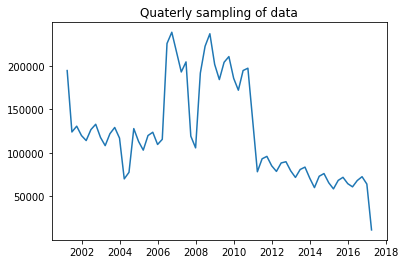

In [39]:
plt.plot(Chicago_df.resample('q').size());
plt.title('Quaterly sampling of data');


## Preparing the Data

In [41]:
chicago_prophet = Chicago_df.resample('M').size().reset_index()

In [44]:
chicago_prophet

,Date,0
0,2001-01-31,74995
1,2001-02-28,66288
2,2001-03-31,53122
3,2001-04-30,40166
4,2001-05-31,41876
...,...,...
188,2016-09-30,23235
189,2016-10-31,23314
190,2016-11-30,21140
191,2016-12-31,19580


In [45]:
chicago_prophet.columns = ['Date' , 'Crime Count']

In [46]:
chicago_prophet.head()

,Date,Crime Count
0,2001-01-31,74995
1,2001-02-28,66288
2,2001-03-31,53122
3,2001-04-30,40166
4,2001-05-31,41876


In [47]:
chicago_prophet_df_final = chicago_prophet.rename(columns = {'Date': 'ds' , 'Crime Count' :'y'})

In [48]:
chicago_prophet_df_final.head()

,ds,y
0,2001-01-31,74995
1,2001-02-28,66288
2,2001-03-31,53122
3,2001-04-30,40166
4,2001-05-31,41876


## Make predictions

In [50]:
m = Prophet()
m.fit(chicago_prophet_df_final)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [51]:
future = m.make_future_dataframe(periods = 365)
forecast = m.predict(future)

In [54]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-31,40548.488274,23006.611263,54498.740222,40548.488274,40548.488274,-1578.253465,-1578.253465,-1578.253465,-1578.253465,-1578.253465,-1578.253465,0.0,0.0,0.0,38970.234809
1,2001-02-28,40695.732253,19338.842243,50111.020940,40695.732253,40695.732253,-6453.992631,-6453.992631,-6453.992631,-6453.992631,-6453.992631,-6453.992631,0.0,0.0,0.0,34241.739623
2,2001-03-31,40858.752373,23353.941733,54959.526950,40858.752373,40858.752373,-2068.601484,-2068.601484,-2068.601484,-2068.601484,-2068.601484,-2068.601484,0.0,0.0,0.0,38790.150889
3,2001-04-30,41016.513779,23384.918841,55631.359719,41016.513779,41016.513779,-1472.229751,-1472.229751,-1472.229751,-1472.229751,-1472.229751,-1472.229751,0.0,0.0,0.0,39544.284028
4,2001-05-31,41179.533899,29283.878363,60820.738433,41179.533899,41179.533899,3883.090066,3883.090066,3883.090066,3883.090066,3883.090066,3883.090066,0.0,0.0,0.0,45062.623965


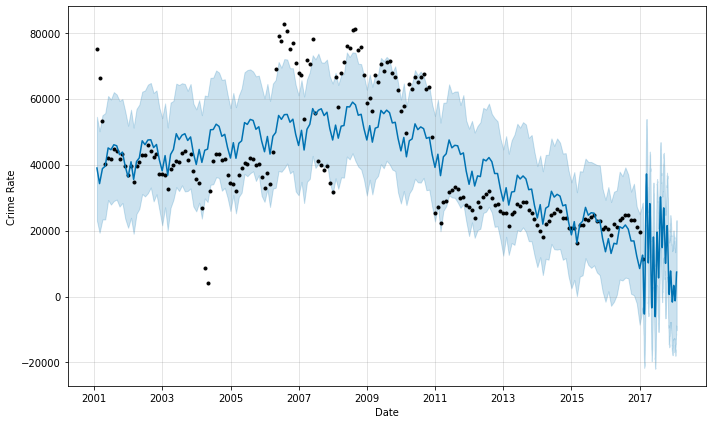

In [53]:
figure = m.plot(forecast,xlabel = 'Date' , ylabel = 'Crime Rate' )

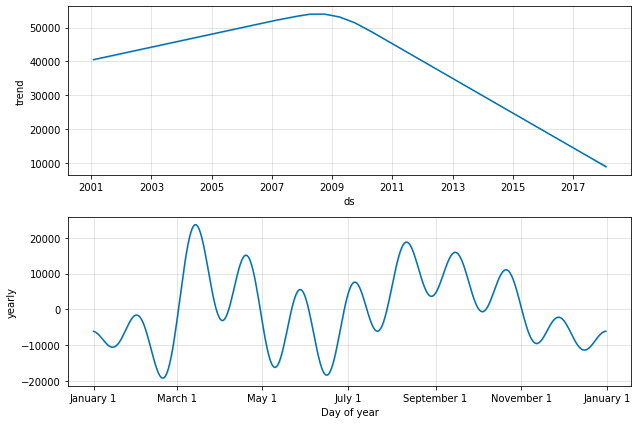

In [55]:
figure = m.plot_components(forecast)

## prediction after 2 years

In [59]:
future_2 = m.make_future_dataframe(periods = 720)
forecast_2 = m.predict(future)

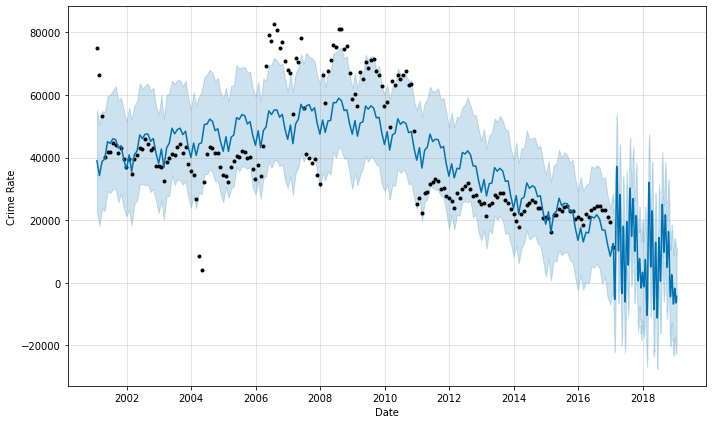

In [60]:
figure = m.plot(forecast_2,xlabel = 'Date' , ylabel = 'Crime Rate' )

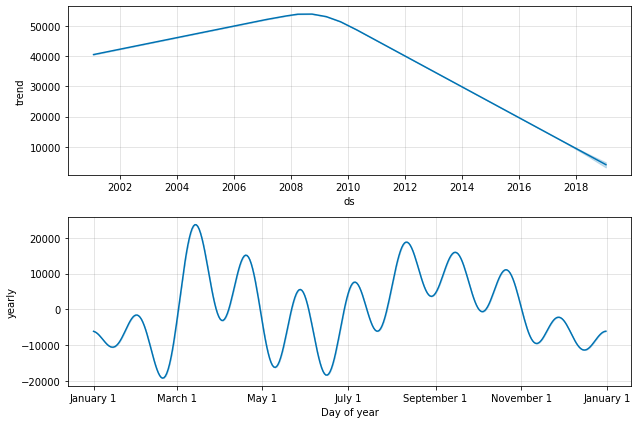

In [61]:
figure = m.plot_components(forecast_2)